In [1]:
import pandas as pd
import my_functions as mf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import importlib

<img src = 'ASTRO_logo.png'>

**BREEZE Multicenter Study**
--

The following is a notebook containing the data analysis for the BREEZE multicenter study
This is a registry of those who applied to be living donors using the BREEZE platform across different centers
Based on the previously published single center version
- Please see 'A Contemporary Analysis of Mental Well-being
Among Living Donor Kidney Applicants'
- doi: 10.1097/TXD.0000000000001631

\
I have done my best to document every step of the way\
Required is the legend from Jai Prasadh, who did analysis on aforementioned paper\
Could not be possible without his well documented code :) \
\
Thanks, \
Brian Jafari MS2




### Data Cleaning

First, we start with cleaning/coding

In [3]:
#Stacking the slices
rec = []
for i in range(1, 4):
    fname = f'breezereport_042225_slice{i}.csv'
    if i == 1:
        d = pd.read_csv(fname, encoding='latin-1')
        cols = d.columns
    else:
        d = pd.read_csv(fname, header=None, names=cols, encoding='latin-1')
    rec.append(d)

df = pd.concat(rec, ignore_index=True)
    

In [4]:
#What columns are we working with

In [5]:
for i in df.columns:
    print(i)

Transplant Center
Record ID
Completed
Screening_Passed
Gender
BMI
DOB
Zip Code
Preferred Language
Translator Required
Race
Ethnicity
Medications
Medical History
Allergies
Medical Insurance Status
Surgical History
PCP City
Family Medical History
Recipient
Relationship
etohextended
Exercise Frequency
druguse
tobacco
Donor Type
Employment Status
Level of Education
Living Accommodation
Marital Status


In [6]:
#EtOH

In [7]:
df.etohextended.unique()

array(['EtOH: Denies', nan, 'EtOH: Rare (1-2 drinks/year)',
       'EtOH: Rare (1-2 drinks/month)',
       'EtOH: Occasional (1-2 drinks/week)',
       'EtOH: Daily (1-2 drinks/day)', 'EtOH: Daily (>2 drinks/day)'],
      dtype=object)

In [8]:
keys   = ['Denies', 'Rare', 'Occasional', 'Daily']
values = np.arange(len(keys))
et_d   = dict(zip(keys, values))


df['etoh_code'] = np.nan

for k, v in et_d.items():
    df.loc[df['etohextended'].str.contains(k, na=False, case=False), 'etoh_code'] = v

In [9]:
#drug use
df.druguse.unique()

array(['Denies', nan, 'Remote', 'Current'], dtype=object)

In [10]:
keys = ['Denies', 'Remote', 'Current']
values = np.arange(len(keys))
il_d = dict(zip(keys, values))
df['druguse_code'] = df.druguse.map(il_d)

In [11]:
#smoking
#what the heck is true
#there is 28 with true - lets interpret it as current
df.tobacco.unique()

array(['Denies', nan, 'Remote', 'Current', 'TRUE'], dtype=object)

In [12]:
t_m = {
    'Denies' : 0,
    'Remote' : 1,
    'Current' : 2,
    'TRUE' : 2
}
df['tobacco_coded'] = df.tobacco.map(t_m)

In [13]:
#exercise
df['Exercise Frequency'].unique()

array([nan, 'Exercise (2 X per week)', 'Exercise (>3X per week)',
       'Exercise (Not on a regular basis)', 'Exercise (3 X per week)',
       'Exercise (1 X per week)', 'Exercise (>3 times per week)'],
      dtype=object)

In [14]:
values = [np.nan, 2, 4, 0, 3, 1, 4]
e_d = dict(zip(df['Exercise Frequency'].unique(), values))
df['exercise_coded'] = df['Exercise Frequency'].map(e_d)

In [15]:
#relationship
df.Relationship.unique()

array([nan, 'Parent', 'Acquaintance', 'Full Sibling', 'Close Friend',
       'Grand Parent', 'Spouse or Partner', 'Spouse', 'Cousin', 'Child',
       'Aunt/Uncle', 'Other', 'Half Sibling', 'Step Child',
       'Member of the same community', 'Niece/Nephew',
       'Significant Other', 'Father/Mother In-Law',
       'Met through social media (such as Facebook)', 'Co-worker',
       'Step Sibling', 'Step Parent', 'Son/Daughter In-Law',
       'Sister/Brother In-Law', 'Grand Child', 'Aunt or Uncle',
       'Not related (Other)', 'Met through social media',
       'Sister or Brother In Law', 'Niece or Nephew',
       'Father or Mother In Law', 'Son or Daughter In Law'], dtype=object)

In [27]:
keys = ['Spouse',
'Significant Other',
'Spouse or Partner',
'Child',
'Parent',
'Full Sibling',
'Half Sibling',
'Step Parent',
'Step Child',
'Step Sibling',
'Grand Parent',
'Sister or Brother In Law',
'Father or Mother In Law',
'Cousin',
'Niece or Nephew',
'Aunt or Uncle',
'Son or Daughter In Law',
'Grand Child',
'Aunt/Uncle',
'Sister/Brother In-Law',
'Niece/Nephew',
'Son/Daughter In-Law',
'Father/Mother In-Law',
'Close Friend',
'Acquaintance',
'Co-worker',
'Member of the same community',
'Not related (Other)',
'Other',
'Met through social media',
'Met through social media (such as Facebook)']

values = [
'Immediate family',
'Immediate family',
'Immediate family',
'Immediate family',
'Immediate family',
'Immediate family',
'Immediate family',
'Immediate family',
'Immediate family',
'Immediate family',
'Immediate family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Extended family',
'Friend',
'Friend',
'Friend',
'Unrelated',
'Unrelated',
'Unrelated',
'Unrelated',
'Unrelated'
]

rel_m = dict(zip(keys, values))

In [28]:
df['relationship_grouped'] = df['Relationship'].map(rel_m)

In [29]:
#coefficient of relatedness

In [30]:
#I got lazy copying and pasting, manually typing the keys
#there is a module to make this easy (thanks o4-mini-high)
#to anyone reading this - copy and paste from Jai's Legend
#both the keys and values in one rip (cells J4:K34)
#let the code do what it does 

import tkinter as tk

# grab whatever you just copied in Excel
root = tk.Tk()
root.withdraw()
text = root.clipboard_get()

# each line is “key<TAB>value”
cr_m = {k: v for k, v in (row.split('\t') for row in text.strip().splitlines())}


In [31]:
df['coeff_rel'] =  df.Relationship.map(cr_m)

In [ ]:
#IM USING THE COPY PASTE THING FROM HERE ON
#IF YOU ARE REPLICATING/RESTART KERNEL, YOU NEED TO 
#COPY PASTE APPROPRIATELY BEFORE EACH BLOCK

In [32]:
#Race
df.Race

0                                             Caucasian
1                             Black or African American
2                             Black or African American
3                      American Indian or Alaska Native
4                             Black or African American
                              ...                      
48853                                     Not Specified
48854                                     Not Specified
48855                                         Caucasian
48856    Not Specified, Middle Eastern or North African
48857                                         Caucasian
Name: Race, Length: 48858, dtype: object

In [33]:
# grab whatever you just copied in Excel
root = tk.Tk()
root.withdraw()
text = root.clipboard_get()

# each line is “key<TAB>value”
rac_m = {k: v for k, v in (row.split('\t') for row in text.strip().splitlines())}

In [34]:
df['race_coded'] = df.Race.map(rac_m)

In [25]:
#Taking Antidepressant/Anxiolytic
root = tk.Tk()
root.withdraw()
text = root.clipboard_get()
ad_ax = text.strip().splitlines()

In [36]:
pattern = '|'.join(ad_ax)
df['taking_ad_ax'] = df.Medications.str.contains(pattern, case=False, regex=True)

In [116]:
df['taking_ad_ax'] = df.taking_ad_ax.fillna(False)

In [ ]:
#Depression

In [62]:
text = root.clipboard_get()
dep = text.strip().replace('*', '').splitlines()
pattern = '|'.join(dep)
df['depression'] = df['Medical History'].str.contains(pattern, case=False, regex=True)

In [68]:
#Anxiety
text = root.clipboard_get()
anx = text.strip().replace('*', '').splitlines()
pattern = '|'.join(anx)

In [70]:
df['anxiety'] = df['Medical History'].str.contains(pattern, case=False, regex=True)

In [72]:
#Sleep Disorder
text = root.clipboard_get()
sleep = text.strip().replace('*', '').splitlines()
pattern = '|'.join(sleep)

In [74]:
df['sleep_disorder'] = df['Medical History'].str.contains(pattern, case=False, regex=True)

In [76]:
#Other Psyciatric condition
text = root.clipboard_get()
other = text.strip().replace('*', '').splitlines()
pattern = '|'.join(other)
df['other_psychiatric_condition'] = df['Medical History'].str.contains(pattern, case=False, regex=True)

In [117]:
#Thats all for how Jai coded!
#Lets export it and put this to rest 
#That way we dont have to copy paste bullshit anymore
df.to_csv('breeze_multicenter_coded.csv', index=False)

# Start Here

Here is where the analysis starts


In [103]:
from numpy import dtype

In [118]:
dtypes = {'Transplant Center': dtype('O'),
 'Record ID': dtype('O'),
 'Completed': dtype('O'),
 'Screening_Passed': dtype('int64'),
 'Gender': dtype('O'),
 'BMI': dtype('float64'),
 'DOB': dtype('O'),
 'Zip Code': dtype('O'),
 'Preferred Language': dtype('O'),
 'Translator Required': dtype('O'),
 'Race': dtype('O'),
 'Ethnicity': dtype('O'),
 'Medications': dtype('O'),
 'Medical History': dtype('O'),
 'Allergies': dtype('O'),
 'Medical Insurance Status': dtype('O'),
 'Surgical History': dtype('O'),
 'PCP City': dtype('O'),
 'Family Medical History': dtype('O'),
 'Recipient': dtype('O'),
 'Relationship': dtype('O'),
 'etohextended': dtype('O'),
 'Exercise Frequency': dtype('O'),
 'druguse': dtype('O'),
 'tobacco': dtype('O'),
 'Donor Type': dtype('O'),
 'Employment Status': dtype('O'),
 'Level of Education': dtype('O'),
 'Living Accommodation': dtype('O'),
 'Marital Status': dtype('O'),
 'etoh_code': dtype('float64'),
 'druguse_code': dtype('float64'),
 'tobacco_coded': dtype('float64'),
 'exercise_coded': dtype('float64'),
 'relationship_grouped': dtype('O'),
 'coeff_rel': dtype('float64'),
 'race_coded': dtype('O'),
 'taking_ad_ax': dtype('int'),
 'depression': dtype('int'),
 'anxiety': dtype('int'),
 'sleep_disorder': dtype('int'),
 'other_psychiatric_condition': dtype('int')}

In [119]:
df = pd.read_csv('breeze_multicenter_coded.csv', dtype = dtypes)

In [128]:
#Convert to datetimes
datetimes = ['Completed', 'DOB']
for col in datetimes:
    df[col] = pd.to_datetime(df[col])

In [135]:
#Age is not a column
#Define as completed date - DOB
df['age'] = (df.Completed - df.DOB).apply(lambda x: x.days)
df.age = (df.age / 365).round(0)

In [143]:
df.age.unique()

array([ 26.,  32.,  59.,  71.,  41.,  63.,  52.,  24.,  55.,  62.,  49.,
        50.,  40.,  46.,  36.,  31.,  30.,  69.,  44.,  70.,  60.,  43.,
        35.,  85.,  25.,  27.,  38.,  45.,  57.,  33.,  21.,  23.,  37.,
        29.,  28.,  68.,  22.,  42.,  54.,  66.,  64.,  75.,  48.,  51.,
        39.,  72.,  58.,  47.,  56.,  34.,  65.,  61.,  18.,   0.,  74.,
        53.,  19.,  67.,  20.,  17.,  79.,  16.,  73.,  76.,   1.,  78.,
        81.,  77.,  86.,  82.,  84.,  15.,  87.,  83.,  80.,  13.,  nan,
        89.,   4.,  -2.,  12.,  14.,  11.,   5.,   9.,  88.,  90.,  91.,
        10., 101., 100.,  94.])

In [153]:
#Lot of age values that dont make sense
#-2 for example
#probably people putting in DOB wrong
#lets say 18-90

In [152]:
df = df.query('age > 18 and age < 90')

In [219]:
df.Gender = df.Gender.mask(df.Gender == 'Non-Binary', 'Other')

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_22314/2931449389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender = df.Gender.mask(df.Gender == 'Non-Binary', 'Other')


In [ ]:
df

## Descriptives

In [220]:
cats = [
    'Gender',
    'Ethnicity',
    'anxiety',
    'depression',
    'taking_ad_ax',
    'race_coded',
    'sleep_disorder',
    'other_psychiatric_condition',
    'relationship_grouped'
]

norm = [
    'age',
    'BMI',
    'etoh_code',
    'druguse_code',
    'tobacco_coded',
    'exercise_coded'
]

In [549]:
desc = pd.DataFrame(mf.char_ser(df, name='Descriptives', cats=cats, norm=norm))
desc.to_excel('breeze_descs.xlsx')
print(desc)

                                                           Descriptives
cat                         var                                        
                            n                                     48319
                            age                             42.7 (13.9)
                            BMI                              29.2 (7.1)
                            etoh_code                         1.2 (0.8)
                            druguse_code                      0.3 (0.6)
                            tobacco_coded                     0.3 (0.6)
                            exercise_coded                    2.3 (1.5)
Gender                      Female                        32286 (66.8%)
                            Male                          15976 (33.1%)
                            Other                             57 (0.1%)
Ethnicity                   Not Hispanic/Latino           38025 (78.7%)
                            Hispanic/Latino               10293 

## Trends

In [171]:
df['year'] = df.Completed.apply(lambda x : x.year)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_22314/540861732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.Completed.apply(lambda x : x.year)


In [184]:
# # applicants by year
p_y = df.groupby('year').size()
print(p_y)
print(f'Mean (std) # of applicants yearly : {p_y.mean():.0f} ({p_y.std():.0f})')

year
2018    5629
2019    7468
2020    5199
2021    6425
2022    8068
2023    8373
2024    7157
dtype: int64
Mean (std) # of applicants yearly : 6903 (1201)


In [190]:
df.Ethnicity.unique()

array(['Not Hispanic/Latino', 'Hispanic/Latino', nan], dtype=object)

In [205]:
#divided by ethnoracial group (black, latino, other)
conds = [
    df['Ethnicity'] == 'Hispanic/Latino',
    df['race_coded'] == 'Black'
]
choices = ['H', 'B']

df['erg'] = np.select(conds, choices, default='All Other')


/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_22314/429496907.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['erg'] = np.select(conds, choices, default='All Other')


In [279]:
#applicants by year per erg

p_y_erg = df.groupby('year')['erg']
print(p_y_erg.value_counts())
print(p_y_erg.value_counts(normalize=True).round(2))

year  erg      
2018  All Other    3991
      H            1244
      B             394
2019  All Other    5293
      H            1579
      B             596
2020  All Other    3791
      H             991
      B             417
2021  All Other    4557
      H            1374
      B             494
2022  All Other    5691
      H            1664
      B             713
2023  All Other    5754
      H            1870
      B             749
2024  All Other    4989
      H            1571
      B             597
Name: count, dtype: int64
year  erg      
2018  All Other    0.71
      H            0.22
      B            0.07
2019  All Other    0.71
      H            0.21
      B            0.08
2020  All Other    0.73
      H            0.19
      B            0.08
2021  All Other    0.71
      H            0.21
      B            0.08
2022  All Other    0.71
      H            0.21
      B            0.09
2023  All Other    0.69
      H            0.22
      B            0.09
2024  

In [222]:
#applicants per year by gender
p_y_g = df.groupby('year')['Gender']
print(p_y_g.value_counts())
print(p_y_g.value_counts(normalize=True).round(2))

year  Gender
2018  Female    3780
      Male      1849
2019  Female    5039
      Male      2429
2020  Female    3417
      Male      1782
2021  Female    4240
      Male      2184
      Other        1
2022  Female    5494
      Male      2566
      Other        8
2023  Female    5614
      Male      2738
      Other       21
2024  Female    4702
      Male      2428
      Other       27
Name: count, dtype: int64
year  Gender
2018  Female    0.67
      Male      0.33
2019  Female    0.67
      Male      0.33
2020  Female    0.66
      Male      0.34
2021  Female    0.66
      Male      0.34
      Other     0.00
2022  Female    0.68
      Male      0.32
      Other     0.00
2023  Female    0.67
      Male      0.33
      Other     0.00
2024  Female    0.66
      Male      0.34
      Other     0.00
Name: proportion, dtype: float64


In [225]:
#mean age by year
a_y = df.groupby('year').age.mean()
print(a_y.round(2))

year
2018    41.94
2019    42.06
2020    41.59
2021    43.09
2022    43.05
2023    43.85
2024    42.90
Name: age, dtype: float64


In [226]:
#Mean BMI by year
b_y = df.groupby('year').BMI.mean()
print(b_y.round(2))

year
2018    28.85
2019    29.24
2020    28.70
2021    29.32
2022    29.35
2023    29.67
2024    29.12
Name: BMI, dtype: float64


In [228]:
#Relationship type by year
#Proportions
r_y = df.groupby('year').relationship_grouped
print(r_y.value_counts())
print(r_y.value_counts(normalize=True).round(2))

year  relationship_grouped
2018  Immediate family        1697
      Friend                  1417
      Unrelated               1158
      Extended family          840
2019  Immediate family        2309
      Friend                  1935
      Unrelated               1481
      Extended family         1080
2020  Immediate family        1519
      Friend                  1322
      Unrelated               1231
      Extended family          748
2021  Immediate family        1945
      Friend                  1537
      Unrelated               1371
      Extended family          828
2022  Immediate family        2330
      Friend                  1951
      Unrelated               1819
      Extended family          857
2023  Immediate family        2440
      Unrelated               2112
      Friend                  1817
      Extended family          905
2024  Immediate family        2358
      Unrelated               1718
      Friend                  1470
      Extended family       

In [242]:
df['erg_2'] = df.erg.mask((df.race_coded == 'White') & (df.erg != "H"), 'White')

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_22314/3540581516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['erg_2'] = df.erg.mask((df.race_coded == 'White') & (df.erg != "H"), 'White')


In [246]:
#relationship by erg
er_r = df.groupby('erg_2').relationship_grouped
print(er_r.value_counts())
print(er_r.value_counts(normalize=True).round(2))

erg_2      relationship_grouped
All Other  Immediate family        2168
           Friend                   921
           Extended family          761
           Unrelated                735
B          Immediate family        2012
           Friend                   704
           Extended family          605
           Unrelated                387
H          Immediate family        4574
           Friend                  1858
           Extended family         1581
           Unrelated               1530
White      Unrelated               8238
           Friend                  7966
           Immediate family        5844
           Extended family         3058
Name: count, dtype: int64
erg_2      relationship_grouped
All Other  Immediate family        0.47
           Friend                  0.20
           Extended family         0.17
           Unrelated               0.16
B          Immediate family        0.54
           Friend                  0.19
           Extended family    

In [329]:
#depression, anxiety, taking antidepressant anxiolytic
ment_g = df.groupby('year')

In [375]:
mh = ['depression', 'anxiety', 'sleep_disorder','taking_ad_ax']

In [376]:
for col in mh:
    print(ment_g[col].value_counts())
    print(ment_g[col].value_counts(normalize=True).round(2))

year  depression
2018  0             5004
      1              625
2019  0             6555
      1              913
2020  0             4538
      1              661
2021  0             5692
      1              733
2022  0             7190
      1              878
2023  0             7384
      1              989
2024  0             6246
      1              911
Name: count, dtype: int64
year  depression
2018  0             0.89
      1             0.11
2019  0             0.88
      1             0.12
2020  0             0.87
      1             0.13
2021  0             0.89
      1             0.11
2022  0             0.89
      1             0.11
2023  0             0.88
      1             0.12
2024  0             0.87
      1             0.13
Name: proportion, dtype: float64
year  anxiety
2018  0          4967
      1           662
2019  0          6543
      1           925
2020  0          4550
      1           649
2021  0          5692
      1           733
2022  0          

In [ ]:
#To see all in one df look here

In [346]:
y_dict = {k : df.query('year == @v') for k, v in zip(df.year.unique(), df.year.unique())}

In [368]:
list(range(2018, 2025, 1)).append('p')

In [377]:
ct = mf.char_table(y_dict, 
                   cats = ['Gender', 'depression', 'anxiety', 'taking_ad_ax', 'sleep_disorder', 'relationship_grouped', 'erg'],
                   norm = ['age', 'BMI']
                  
                  
                  
                  )
ct[list(range(2018, 2025, 1)) + ['p']]

2018          2019  \
cat                  var                                            
                     n                         5629          7468   
                     age                41.9 (13.7)   42.1 (13.6)   
                     BMI                 28.9 (6.6)    29.2 (6.8)   
Gender               Female            3780 (67.2%)  5039 (67.5%)   
                     Male              1849 (32.8%)  2429 (32.5%)   
                     Other                                          
depression           0                 5004 (88.9%)  6555 (87.8%)   
                     1                  625 (11.1%)   913 (12.2%)   
anxiety              0                 4967 (88.2%)  6543 (87.6%)   
                     1                  662 (11.8%)   925 (12.4%)   
taking_ad_ax         0                 4913 (87.3%)  6525 (87.4%)   
                     1                  716 (12.7%)   943 (12.6%)   
sleep_disorder       0                 5284 (93.9%)  6994 (93.7%)   
                     1                   345 (6.1%)    474 (6.3%)   
relationship_grouped Immediate family  1697 (33.2%)  2309 (33.9%)   
                     Friend            1417 (27.7%)  1935 (28.4%)   
                     Unrelated         1158 (22.7%)  1481 (21.8%)   
                     Extended family    840 (16.4%)  1080 (15.9%)   
erg                  All Other         3991 (70.9%)  5293 (70.9%)   
                     H                 1244 (22.1%)  1579 (21.1%)   
                     B                   394 (7.0%)    596 (8.0%)   

                                               2020          2021  \
cat                  var                                            
                     n                         5199          6425   
                     age                41.6 (13.8)   43.1 (13.9)   
                     BMI                 28.7 (6.5)    29.3 (7.0)   
Gender               Female            3417 (65.7%)  4240 (66.0%)   
                     Male              1782 (34.3%)  2184 (34.0%)   
                     Other                               1 (0.0%)   
depression           0                 4538 (87.3%)  5692 (88.6%)   
                     1                  661 (12.7%)   733 (11.4%)   
anxiety              0                 4550 (87.5%)  5692 (88.6%)   
                     1                  649 (12.5%)   733 (11.4%)   
taking_ad_ax         0                 4512 (86.8%)  5609 (87.3%)   
                     1                  687 (13.2%)   816 (12.7%)   
sleep_disorder       0                 4894 (94.1%)  6117 (95.2%)   
                     1                   305 (5.9%)    308 (4.8%)   
relationship_grouped Immediate family  1519 (31.5%)  1945 (34.2%)   
                     Friend            1322 (27.4%)  1537 (27.1%)   
                     Unrelated         1231 (25.5%)  1371 (24.1%)   
                     Extended family    748 (15.5%)   828 (14.6%)   
erg                  All Other         3791 (72.9%)  4557 (70.9%)   
                     H                  991 (19.1%)  1374 (21.4%)   
                     B                   417 (8.0%)    494 (7.7%)   

                                               2022          2023  \
cat                  var                                            
                     n                         8068          8373   
                     age                43.0 (14.0)   43.8 (13.8)   
                     BMI                 29.3 (7.3)    29.7 (7.9)   
Gender               Female            5494 (68.1%)  5614 (67.0%)   
                     Male              2566 (31.8%)  2738 (32.7%)   
                     Other                 8 (0.1%)     21 (0.3%)   
depression           0                 7190 (89.1%)  7384 (88.2%)   
                     1                  878 (10.9%)   989 (11.8%)   
anxiety              0                 7146 (88.6%)  7347 (87.7%)   
                     1                  922 (11.4%)  1026 (12.3%)   
taking_ad_ax         0                 7009

## Figures

Im making the figures here (you couldve guessed that)\
I don't annotate how I make figures but I use seaborn\
lots of documentation online\
this is one thing that chat is actually really good at helping with\
figure labels are based on the single center paper

In [ ]:
#Figure 1A

In [280]:
label_map = {
    'All Other':'All Other',
    'B':'Black',
    'H':'Latino'
}
p_y_erg = pd.DataFrame(p_y_erg.value_counts().reset_index())
p_y_erg['group'] = p_y_erg.erg.map(label_map)

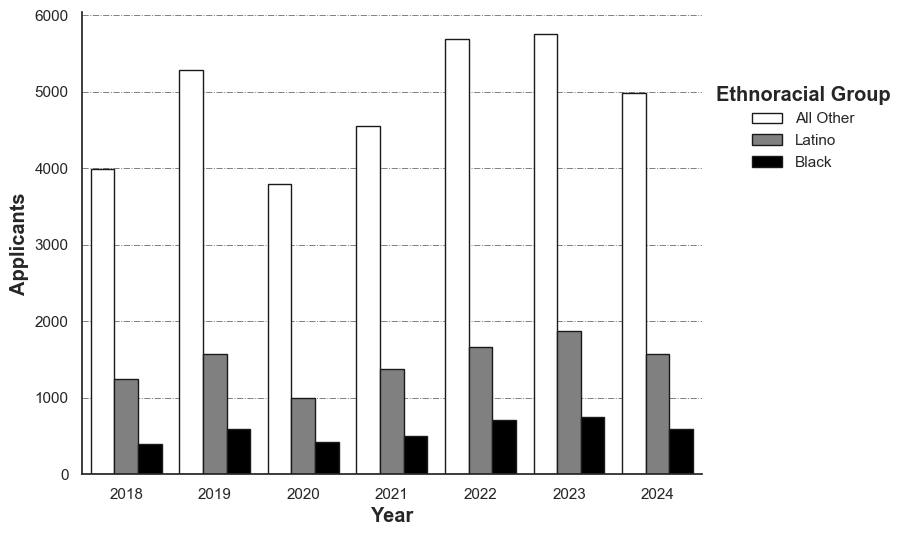

In [554]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.set_style('white')
palette = ['white', 'gray', 'black']
sns.barplot(
    data = p_y_erg,
    x = 'year',
    y = 'count',
    hue = 'group',
    edgecolor='k',
    palette = palette,
    ax = ax
)
ax.yaxis.grid(True, ls='-.', lw=0.7, color = 'gray')
ax.set_xlabel('Year', weight='bold', fontsize = 'large')
ax.set_ylabel('Applicants', weight = 'bold', fontsize = 'large')
ax.legend(title = 'Ethnoracial Group',  loc='center left',
          bbox_to_anchor=(1, 0.75), ncol=1, frameon=False, title_fontproperties={'weight' : 'bold', 'size' : 'large'})
sns.despine()
plt.show()

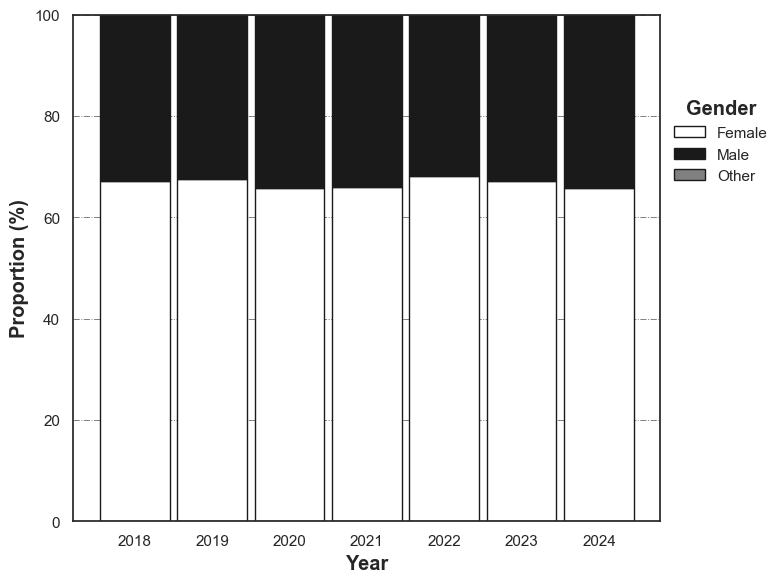

In [553]:
#Figure 1B
df_wide = pyg.pivot(index='year', columns='Gender', values='proportion').fillna(0)


order = ['Female','Male','Other']  
df_wide = df_wide[order]
df_wide *= 100

palette = ['white','k','gray']
fig, ax = plt.subplots(figsize=(8,6))


bottom = pd.Series(0, index=df_wide.index)
for color, col in zip(palette, df_wide.columns):
    ax.bar(
        df_wide.index.astype(str),
        df_wide[col],
        bottom=bottom,
        label=col,
        color=color,
        edgecolor='k',
        width = 0.9
    )
    bottom += df_wide[col]


ax.yaxis.grid(True, ls='-.', lw=0.7, color='gray')
ax.set_xlabel('Year', weight='bold', fontsize='large')
ax.set_ylabel('Proportion (%)', weight='bold', fontsize='large')
ax.legend(title='Gender',  loc='center left',
          bbox_to_anchor=(1, 0.75), ncol=1, frameon=False, title_fontproperties={'weight' : 'bold', 'size' : 'large'})

plt.tight_layout()
plt.show()


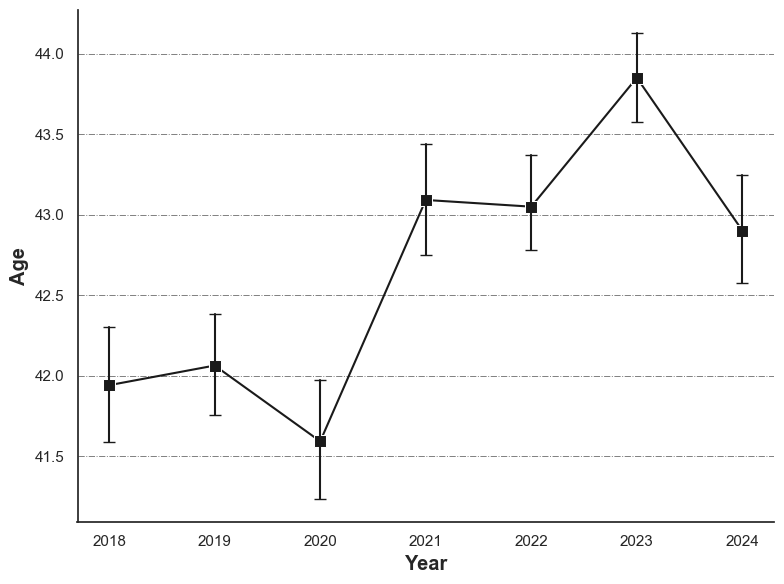

In [555]:
#Figure 1C
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(
    data = df,
    x = 'year',
    y = 'age',
    estimator = 'mean',
    color = 'k',
    marker = 's',
    err_style = 'bars',
    err_kws={'capsize': 4},
    markersize=8
)
sns.despine()

ax.yaxis.grid(True, ls='-.', lw=0.7, color='gray')
ax.set_xlabel('Year', weight='bold', fontsize='large')
ax.set_ylabel('Age', weight='bold', fontsize='large')

plt.tight_layout()
plt.show()

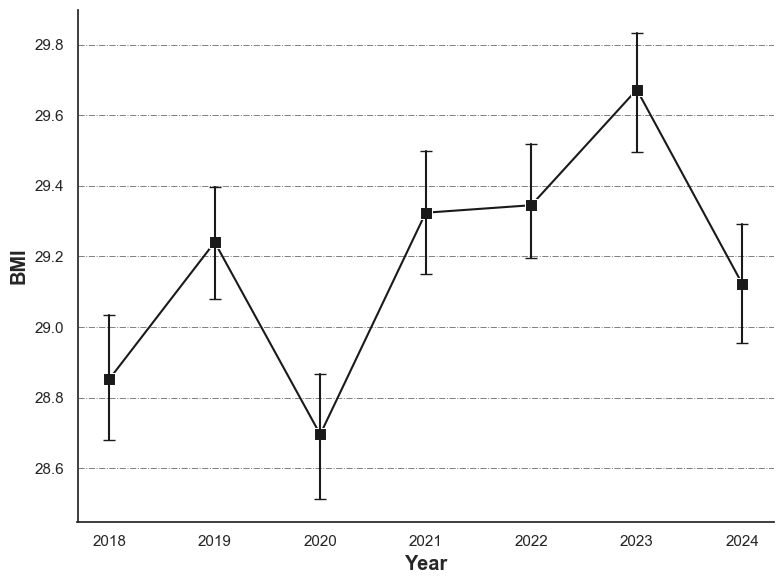

In [556]:
#Figure 1D
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(
    data = df,
    x = 'year',
    y = 'BMI',
    estimator = 'mean',
    color = 'k',
    marker = 's',
    err_style = 'bars',
    err_kws={'capsize': 4},
    markersize=8
)
sns.despine()

ax.yaxis.grid(True, ls='-.', lw=0.7, color='gray')
ax.set_xlabel('Year', weight='bold', fontsize='large')
ax.set_ylabel('BMI', weight='bold', fontsize='large')

plt.tight_layout()
plt.show()

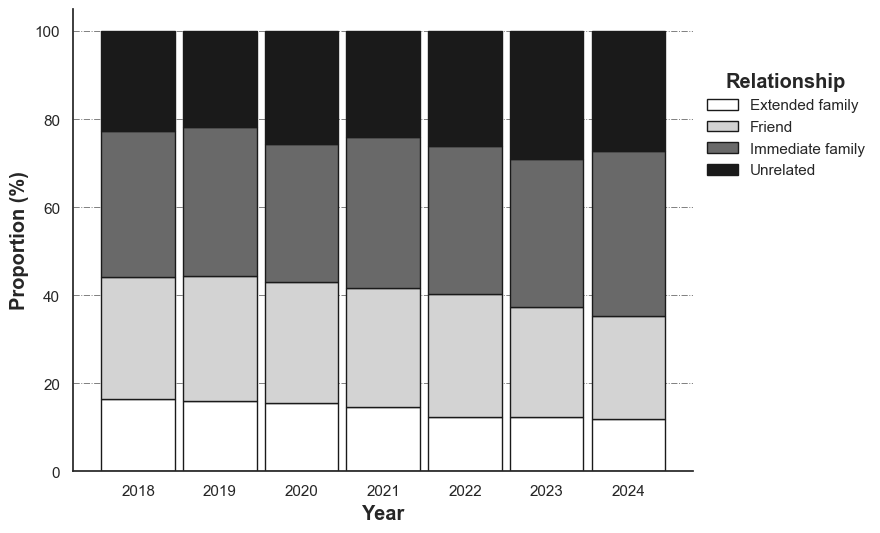

In [557]:
#Figure 2A
ry = pd.DataFrame(r_y.value_counts(normalize=True)).reset_index()
ry_wide = ry.pivot(index = 'year', columns = 'relationship_grouped', values = 'proportion')
ry_wide *= 100
order = ['Unrelated', 'Friend', 'Immediate Family', 'Extended Family']
palette = ['white', 'lightgray', 'dimgray', 'k']
fig, ax = plt.subplots(figsize = (8, 6))
bottoms = pd.Series(0, index = ry_wide.index)
for c, col in zip(palette, ry_wide.columns):
    ax.bar(
        ry_wide.index.astype(str),
        ry_wide[col],
        width = 0.9,
        color = c,
        bottom = bottoms,
        edgecolor = 'k',
        label = col
    )
    bottoms += ry_wide[col]
ax.yaxis.grid(True, ls='-.', lw=0.7, color='gray')
ax.set_xlabel('Year', weight='bold', fontsize='large')
ax.set_ylabel('Proportion (%)', weight='bold', fontsize='large')
ax.legend(title='Relationship', loc='center left',
          bbox_to_anchor=(1, 0.75), ncol=1, frameon=False, title_fontproperties={'weight' : 'bold', 'size' : 'large'})
sns.despine()
plt.show()

In [493]:
#Figure 2B
cr = df.groupby(['year', 'erg'])['coeff_rel'].value_counts()

In [521]:
df['depression']

0        0
1        0
2        1
3        0
4        0
        ..
48853    0
48854    0
48855    0
48856    0
48857    1
Name: depression, Length: 48319, dtype: int64

In [537]:
df['summ'] = (df[['depression', 'anxiety', 'sleep_disorder']].sum(axis=1) == 3).astype(int)

/var/folders/nx/_g213lmj3b79wrzpf1wxbcc40000gn/T/ipykernel_22314/156209857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summ'] = (df[['depression', 'anxiety', 'sleep_disorder']].sum(axis=1) == 3).astype(int)


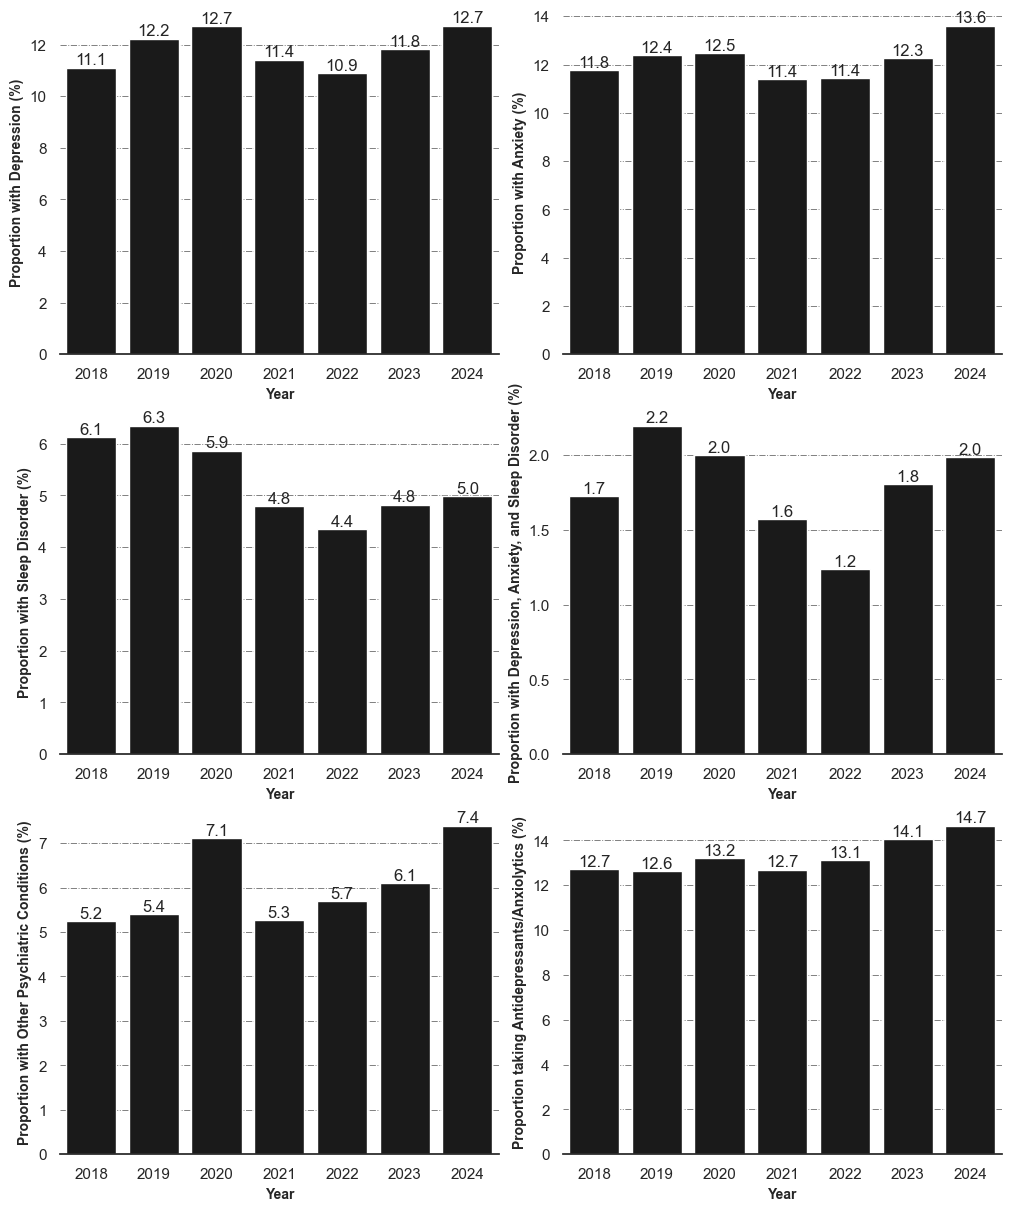

In [545]:
#Figure 3 Ima make in one rip because it seems easy to do so
pw = ['with Depression', 
      'with Anxiety', 
      'with Sleep Disorder', 
      'with Depression, Anxiety, and Sleep Disorder',
      'with Other Psychiatric Conditions',
      'taking Antidepressants/Anxiolytics'
     ]

conds = ['depression', 'anxiety', 'sleep_disorder', 'summ', 'other_psychiatric_condition', 'taking_ad_ax']
fig, axs = plt.subplots(3, 2, figsize = (10, 12), layout='constrained')
for i, ax in enumerate(axs.flatten()):
    
    d = df.groupby('year')[conds[i]].value_counts(normalize=True)
    d = pd.DataFrame(d).reset_index().query(f'{conds[i]} == 1')
    d.proportion *= 100
    sns.barplot(
        x = 'year',
        y = 'proportion',
        data = d,
        ax = ax,
        color = 'k'
        
    )

        
    ax.yaxis.grid(True, ls='-.', lw=0.7, color='gray')
    ax.set_ylabel(f'Proportion {pw[i]} (%)', weight='bold', fontsize='small', wrap=True)
    ax.set_xlabel('Year', weight='bold', fontsize='small')
    ax.bar_label(ax.containers[0], fmt = '%.1f')
    

sns.despine(left = True)